# Logictic Regression

逻辑斯特回归相当于将线性回归的输出$W^TX$加了一个sigmoid函数，使得其值域为(0, 1)  
逻辑斯特回归是一个分类模型

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

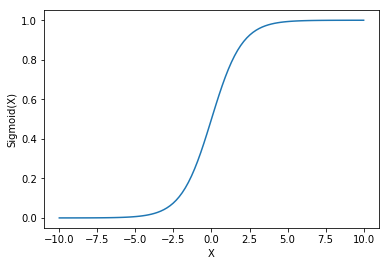

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-10, 10, 100)
z = sigmoid(x)
plt.plot(x, z)
plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.show()

$Z = Sigmoid(X) = \frac{1}{1+e^{-X}}$   
**求导**  

$f'(z) = (\frac{1}{1+e^{-z}})'$

$=\frac{e^{-z}}{(1+e^{-z})^2}$

$=(\frac{1}{1+e^{-z}})(1-(\frac{1}{1+e^{-z}}))$

$=f(z)(1-f(z))$

**对于二分类**  
$P_1 = P(y=1|x,W)=\sigma(W^Tx) = \frac{1}{1+e^{-W^Tx}}$  
$P_0 = P(y=0|x,W)=1-\sigma(W^Tx) = \frac{e^{-W^TX}}{1+e^{-W^Tx}}$    
当然，两个概率可以互换

两个条件可以合并成  

$P(y|x)={P(y=1|x,W)}^y[{1-P(y=1|x,W)}]^{1-y}$

设有一点使$P_1=P_0$  
$\Rightarrow \frac{1}{1+e^{-W^TX}} = \frac{e^{-W^TX}}{1+e^{-W^TX}}$

$\Rightarrow 1=e^{W^TX}$  

$\Rightarrow W^TX=0$

$\Rightarrow$ 逻辑回归是线性分类器

**最大似然 MLE**  
$\hat W = \underset W argmax log P(y|x)$  

$=\underset W argmax log \prod_{i=1}^N P(y_i|x_i)$

$=\underset W argmax \sum_{i=1}^N log P(y_i| x_i)$

$=\underset W argmax \sum_{i=1}^N (y_ilogP_1+(1-y_i)log(1-P_1))$

$=\underset W argmax \sum_{i=1}^N (y_ilog\phi(x_i,w)+(1-y_i)log(1-\phi(x_i, w))$

$=\underset W argmin \underbrace{- \sum_{i=1}^N (y_ilog\phi(x_i,w)+(1-y_i)log(1-\phi(x_i, w))}_{Cross Entropy} \Leftarrow minimize$ 

**梯度下降求解W Gradient descent**

设其损失函数  
$\Rightarrow L = - \sum_{i=1}^N (y_ilog\phi(x_i,w)+(1-y_i)log(1-\phi(x_i, w))$

$=- \sum_{i=1}^N (y_ilog\sigma(w^Tx_i+b)+(1-y_i)log(1-\sigma(w^Tx+b))$

$\Rightarrow \frac{\partial L}{\partial b} = -\sum_{i=i}^N(y_i\frac{\sigma(w^Tx+b)(1-\sigma(w^Tx+b))}{\sigma(w^Tx+b)}) + (1-y_i)\frac{-\sigma(w^Tx+b)(1-\sigma(w^Tx+b))}{1-\sigma(w^Tx+b)} = \sum_{i=1}^N(\sigma(w^Tx+b)-y_i)$

$\Rightarrow \frac{\partial L}{\partial w}=\sum_{i=1}^N(\sigma(w^Tx+b)-y_i)x_i$

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


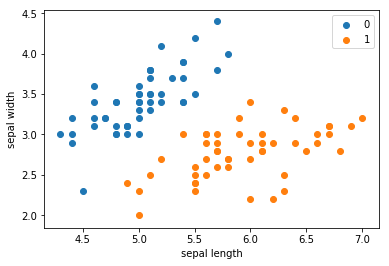

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,[0,1]], data[:,-1]
# y = np.array([1 if i == 1 else -1 for i in y])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
class LogisticRegressionClassifier:
    def __init__(self, max_iter=300, learning_rate=0.001):
        self.max_iter=max_iter
        self.learning_rate=learning_rate
        self.w = None
        self.b = None
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
        
    def log_likehood(self, X, y, w, b):
        # 获取正负样本下标
        positive, negitive = np.where(y==1), np.where(y==0)
        # 正样本损失
        positive_sum = np.sum(np.log(self.sigmoid(np.dot(X[positive], w)+b)))
        # 负样本损失
        negitive_sum = np.sum(np.log(1-self.sigmoid(np.dot(X[negitive], w)+b)))
        # 交叉熵
        return -(positive_sum+negitive_sum)
    

    def fit(self, X, y):
        self.w, self.b = np.random.random(X.shape[1]), np.random.random() # 随机初始化
    #     w, b = np.zeros(X.shape[1]), 0
        for step in range(self.max_iter):
            # 计算误差
            error = self.sigmoid(np.dot(X, self.w)+self.b) - y
            # 梯度计算，见上方公式推导，转化成向量的乘积
            grad_w = np.matmul(X.T, error)
            grad_b = np.sum(error)

            self.w = self.w - self.learning_rate*grad_w
            self.b = self.b - self.learning_rate*grad_b

            # 打印误差
            if step % 1000 == 0:
                print(self.log_likehood(X, y, self.w, self.b)) 

#         return w, b  
        print(self.w)
        print(self.b)
    def predict(self, X_test):
        res = self.sigmoid(np.dot(X_test, self.w)+self.b)
        for i in range(len(res)):
            if res[i] >= 0.5:
                res[i] = 1
            else:
                res[i] = 0
        return res

    def score(self, y_pred, y_test):
        return sum(y_pred==y_test)/len(y_pred)

lr = LogisticRegressionClassifier(max_iter=10000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(y_pred, y_test)

209.52238821659617
9.767112207050147
7.187708938018233
6.210285029304769
5.67851032483223
5.335104713089067
5.089211973640236
4.900381589734162
4.747837187540649
4.6198101497835005
[ 5.64520515 -9.00675822]
-2.666780918276031


1.0

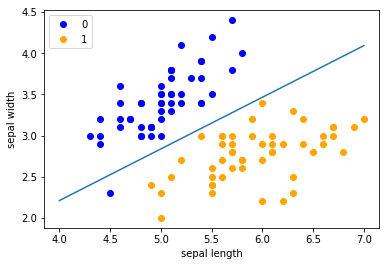

In [7]:
x_points = np.linspace(4, 7 , 10)
y_ = -(lr.w[0]*x_points+lr.b)/lr.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('sklearn 训练的逻辑回归参数:\nw: {}\nb: {}'.format(clf.coef_, clf.intercept_))
y_pred = clf.predict(X_test)
acc = sum(y_pred==y_test)/len(y_test)
print('Accuracy: ', acc)

sklearn 训练的逻辑回归参数:
w: [[ 2.05530367 -3.39402708]]
b: [-0.55923381]
Accuracy:  1.0


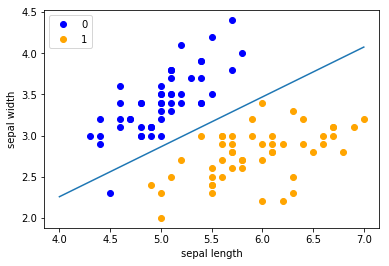

In [9]:
x_points = np.linspace(4, 7 , 10)
y_ = -(clf.coef_[0][0]*x_points+clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 正则项  
|正则|$l(w) = f(w)+\lambda {\Arrowvert w \Arrowvert}_1$|$l(w) = f(w)+\lambda {\Arrowvert w \Arrowvert}_2^2$|
|:-:|:-:|:-:|
|名称|L1 Lasso|L2 Ridge|
|数学|${\Arrowvert w \Arrowvert}_1=\vert w_1\vert+\vert w_2 \vert+...+\vert w_p\vert $ |${\Arrowvert w \Arrowvert}_2^2=w_1^2+w_2^2+...+w_p^2 $ |
|作用|1.参数w变小，2.稀疏性，使得一些参数变为0|让参数变小

In [10]:
size = 100
# 使用高斯分布生产样本，生产20维的特征向量
random_m = np.random.rand(20, 20)
# 保证矩阵为半正定矩阵
cov = np.matmul(random_m.T, random_m)

x1 = np.random.multivariate_normal(np.random.rand(20), cov, size)
x2 = np.random.multivariate_normal(np.random.rand(20)+5, cov, size)

X = np.vstack((x1, x2))
y = np.hstack((np.zeros(size), np.ones(size)))
print(X.shape)
print(y.shape)

(200, 20)
(200,)


C为控制正则化的参数，C越大，正则化的效果越差

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.1, penalty='l1')
clf.fit(X, y)
print('使用L1正则化后的参数：')
print(clf.coef_)
print(clf.intercept_)

使用L1正则化后的参数：
[[ 0.          0.          0.          0.24201389 -0.20763347  0.
   0.19701717  0.         -0.46579152 -0.07111842  0.          0.22163335
   0.          0.          0.          0.18643017  0.          0.53320367
   0.          0.        ]]
[-1.59390331]


In [12]:
clf = LogisticRegression(C=0.1, penalty='l2')
clf.fit(X, y)
print('使用L2正则化后的参数：')
print(clf.coef_)
print(clf.intercept_)

使用L2正则化后的参数：
[[-0.01055832 -0.05998196  0.17533175  0.58024895 -0.42758482 -0.08242584
   0.3490004   0.14405544 -0.68871863 -0.50990197  0.28302242  0.21138679
  -0.01780572  0.37545634 -0.05575677  0.26309483 -0.14278305  0.39588948
  -0.03876886 -0.04629809]]
[-1.1692936]


## 正则与最大后验概率

**最大似然概率**  

$\theta_{MLE} = argmax p(D|\theta)$  

**最大后验概率**     
给定D的情况下，让p最大的$\theta$值,D指数据 

$\theta_{MAP} = argmax p(\theta|D)$ 

$=argmax\frac{p(D|\theta)p(\theta)}{p(D)}$

$=argmax p(D|\theta)p(\theta)$

$=$似然概率*先验概率

可以通过先验概率给模型导入初始信息，比如模型参数可能服从高斯分布，那么可以假定先验分布为高斯分布

***假如先验服从高斯分布***

$p(\theta) \sim N(0, \sigma^2)$

$p(\theta) = \frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{\theta^2}{2\sigma^2})$

$\theta_{MLE}^* = argmaxP(D|\theta)$

$=argmax \prod_{i=1}^Np(y_i|x_i,\theta) $

$=argmax log\prod_{i=1}^Np(y_i|x_i,\theta) $

$=argmax \sum_{i=1}^Nlogp(y_i|x_i,\theta) $

$\theta_{MAP}^*=argmaxP(\theta|D)$

$=argmax P(D|\theta)P(\theta)$

$=argmax log(P(D|\theta)P(\theta))$

$=argmax logP(D|\theta)+logP(\theta)$

$=argmax \sum_{i=1}^Nlogp(y_i|x_i,\theta)+log(\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{\theta^2}{2\sigma^2}))$

$=argmax \sum_{i=1}^Nlogp(y_i|x_i,\theta)-\frac{\theta^2}{2\sigma^2}$

$=argmin - \sum_{i=1}^Nlogp(y_i|x_i,\theta)+\frac{\theta^2}{2\sigma^2}$

$\Rightarrow argmin - \sum_{i=1}^Nlogp(y_i|x_i,\theta)-\frac{1}{2\sigma^2}{\Arrowvert \theta \Arrowvert}_2^2$

$\Rightarrow$***添加高斯的先验相当于加入了L2正则***

***假如先验分布服从拉普拉斯分布***

$p(\theta) \sim Laplace(0, b)$

$p(\theta) = \frac{1}{2b}exp(-\frac{|\theta|}{b})$

$\theta_{MAP}^* =argmax logP(D|\theta)+logP(\theta)$

$=argmax \sum_{i=1}^Nlogp(y_i|x_i,\theta)+log(\frac{1}{2b}exp(-\frac{|\theta|}{b}))$

$=argmax \sum_{i=1}^Nlogp(y_i|x_i,\theta)-\frac{|\theta|}{b})$

$\Rightarrow argmax \sum_{i=1}^Nlogp(y_i|x_i,\theta)-\frac{1}{b}{\Arrowvert \theta \Arrowvert}_1)$

$\Rightarrow argmin - \sum_{i=1}^Nlogp(y_i|x_i,\theta)+\frac{1}{b}{\Arrowvert \theta \Arrowvert}_1)$

$\Rightarrow$***添加拉普拉斯的先验相当于加入了L1正则***

当数据量较少时最好选择MAP估计，因为这时候容易过拟合，而且MAP正好相当于加入了正则项。  
相反，当数据量足够多的时候，可以不采用MAP估计